In [1]:
import numpy as np

In [2]:
def f(x,y,mu=(0,0),sigma=(1,1.5)):
    return np.exp(-(x-mu[0])**2/(2*sigma[0]**2)-(y-mu[1])**2/(2*sigma[1]**2))
def fprima(x,y,a=9.430555555555552,b=-10.632867457575607,c=3.291666666666667,mu=(0,0)):
    Mx = mu[0]; My = mu[1]
    return np.exp(-a*(x-Mx)**2-b*(x-Mx)*(y-My)-c*(y-My)**2)

In [3]:
def transform(sigma=(1,1.5),theta=np.pi/4):
    Sx = sigma[0]; Sy = sigma[1]
    a = (Sx*Sx*np.sin(theta)**2+Sy*Sy*np.cos(theta)**2)/(2*(Sx**2)*(Sy**2))
    b = (2*(Sy**2-Sx**2)*np.sin(theta)*np.cos(theta))/(2*(Sx**2)*(Sy**2))
    c = (Sy*Sy*np.sin(theta)**2+Sx*Sx*np.cos(theta)**2)/(2*(Sx**2)*(Sy**2))
    return a,b,c
def invtransform(a=1,b=-1,c=1):
    Sy=np.sqrt(1/(a+c+np.sqrt(b**2+(a-c)**2)))
    Sx=np.sqrt(1/(a+c-np.sqrt(b**2+(a-c)**2)))
    theta = 0.5*np.arctan2(np.sign(Sy-Sx)*b,np.sign(Sy-Sx)*(a-c))
    return (Sx,Sy),theta

In [4]:
F = fprima
X = [0,0]
Xlist = [X.copy()]
iteraciones = 20000
np.random.seed(13)
N_aceptados = 0
l1 = 0.5
l2 = 4
for it in range(iteraciones):
    # elegimos un punto aleatorio en un círculo de radio 1 centrado en X
    # r = 2*np.random.rand()
    # t = np.random.uniform(0,2*np.pi)
    # X_new = [X[0]+r*np.cos(t),X[1]+r*np.sin(t)]
    dx = l1*np.random.uniform(-0.5,0.5)
    dy = l2*np.random.uniform(-0.5,0.5)
    X_new = [X[0]+dx,X[1]+dy]
    #print("it: %d \tX = %lf,%lf -> X_new = %lf,%lf"%(it+1,*X,*X_new))
    POA = np.minimum(1,F(X_new[0],X_new[1])/F(X[0],X[1]))
    #print("\tPOA =",POA)
    if np.random.rand() <= POA: # Realizamos el salto
        X = X_new.copy()
        N_aceptados += 1
    Xlist.append(X.copy())
Xlist = np.array(Xlist)
print("AR = %.2lf"%(N_aceptados/iteraciones))
print("Testing the mean: ",Xlist.mean(axis=0))
print("Testing the deviation: ",Xlist.std(axis=0))

AR = 0.31
Testing the mean:  [0.01256448 0.01297905]
Testing the deviation:  [0.67901463 1.15490913]


In [5]:
## Grafiquemos

In [6]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

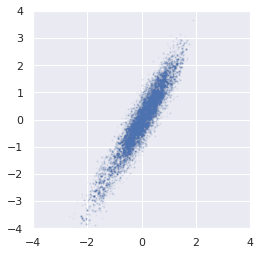

In [7]:
ax = plt.axes()
ax.scatter(Xlist[:,0],Xlist[:,1],s=1,alpha=0.05)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_aspect('equal')

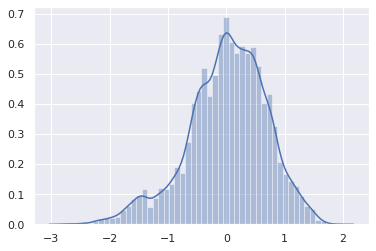

In [8]:
sns.distplot(Xlist[:,0])

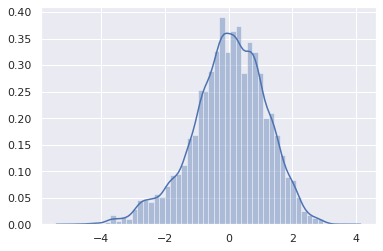

In [9]:
sns.distplot(Xlist[:,1])

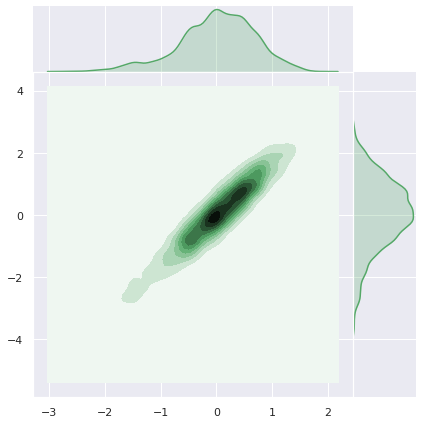

In [10]:
sns.jointplot(Xlist[:,0],Xlist[:,1],kind="kde", space=0, color="g")